In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split

# 오존과 기온, 바람, 태양광과의 영향성 분석

In [3]:
# 최종 모델의 이름을 result라고 가정했을 때 예측
# 일조량 : 313, 풍량 : 15.5, 온도(화씨):84인
# result.predict(313,11.5, 62)

# 결과가 18.0에 가까울수록 잘 예측

### 데이터 가져오기

In [4]:
df = pd.read_csv('ozone.csv', delimiter=',')

In [5]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


### 데이터 확인

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [7]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [8]:
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


## 전처리

### 결측치 처리

In [9]:
df.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

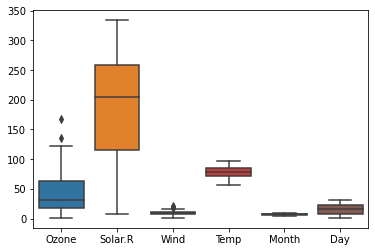

In [10]:
sns.boxplot(data = df)
plt.show()

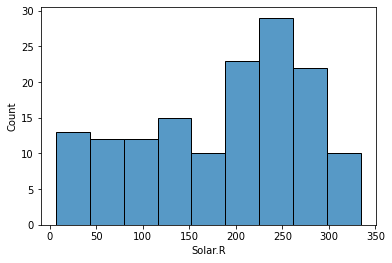

In [11]:
sns.histplot(data = df, x = 'Solar.R');

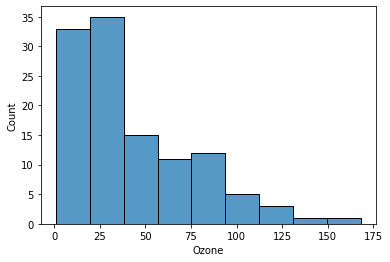

In [12]:
sns.histplot(data = df, x = 'Ozone');

In [13]:
df.mean()

Ozone       42.129310
Solar.R    185.931507
Wind         9.957516
Temp        77.882353
Month        6.993464
Day         15.803922
dtype: float64

In [14]:
df_fillna = df.fillna(df.mean())

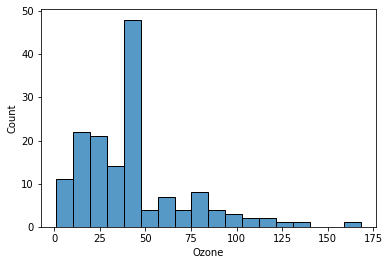

In [15]:
sns.histplot(data = df_fillna, x = 'Ozone');

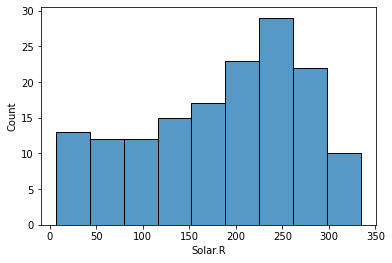

In [16]:
sns.histplot(data = df_fillna, x = 'Solar.R');

In [17]:
df_fillna.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000
50%,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000
75%,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [18]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


# 1. 결측치 전체 삭제 후 예측

In [19]:
df_dropna = df.loc[df['Ozone'].dropna().index]
df_dropna

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
5,28.0,NaN,14.9,66,5,6
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [20]:
df_dropna.isna().sum()

Ozone      0
Solar.R    5
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

<AxesSubplot:xlabel='Solar.R', ylabel='Count'>

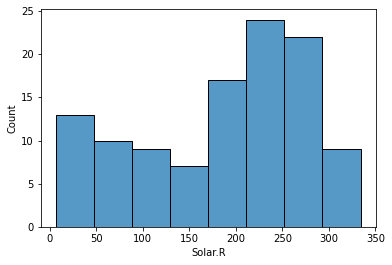

In [21]:
sns.histplot(data = df_dropna, x = 'Solar.R')

In [22]:
df_dropna.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,111.000000,116.000000,116.000000,116.000000,116.000000
mean,42.129310,184.801802,9.862069,77.870690,7.198276,15.534483
std,32.987885,91.152302,3.574856,9.485486,1.475715,8.750087
min,1.000000,7.000000,2.300000,57.000000,5.000000,1.000000
25%,18.000000,113.500000,7.400000,71.000000,6.000000,8.000000
50%,31.500000,207.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,255.500000,11.500000,85.000000,8.250000,22.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [23]:
df_dropna = df_dropna.loc[df_dropna['Solar.R'].dropna().index]
df_dropna

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [24]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    111 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     111 non-null    float64
 3   Temp     111 non-null    int64  
 4   Month    111 non-null    int64  
 5   Day      111 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 6.1 KB


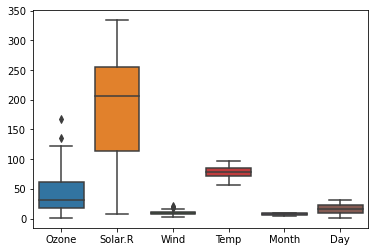

In [25]:
sns.boxplot(data = df_dropna);

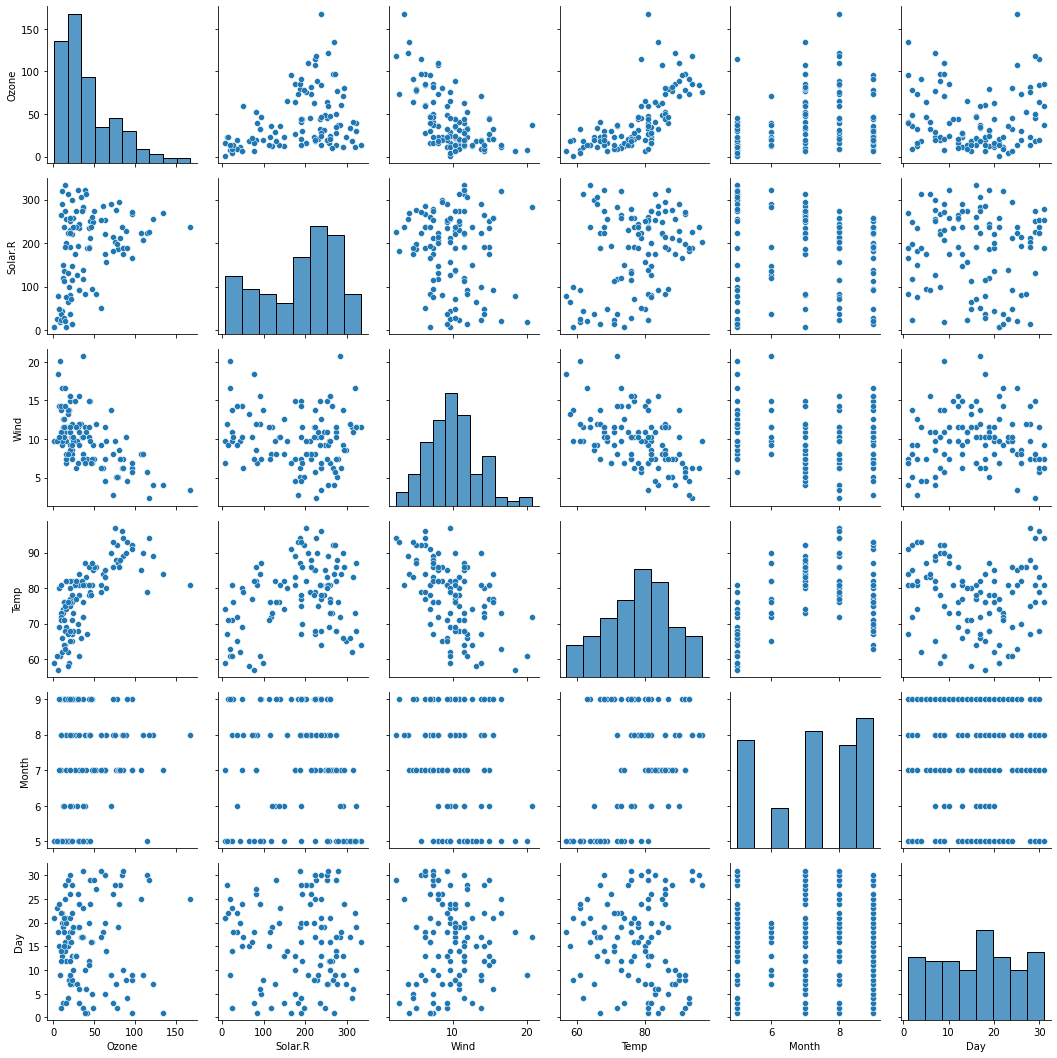

In [26]:
g = sns.PairGrid(df_dropna)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

In [27]:
df_dropna.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.348342,-0.612497,0.698541,0.142885,-0.005190
Solar.R,0.348342,1.000000,-0.127183,0.294088,-0.074067,-0.057754
Wind,-0.612497,-0.127183,1.000000,-0.497190,-0.194496,0.049871
Temp,0.698541,0.294088,-0.497190,1.000000,0.403972,-0.096546
Month,0.142885,-0.074067,-0.194496,0.403972,1.000000,-0.009001
Day,-0.005190,-0.057754,0.049871,-0.096546,-0.009001,1.000000


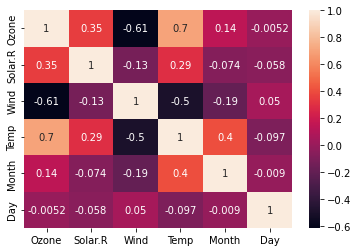

In [28]:
sns.heatmap(df_dropna.corr(), annot=True);

In [29]:
arr_input = np.array(df_dropna[['Solar.R', 'Wind', 'Temp']])
arr_target = np.array(df_dropna[['Ozone']])

In [30]:
train_input, test_input, train_target, test_target = train_test_split(arr_input, arr_target, random_state=42, test_size=0.2)

### 다중선형

In [31]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(train_input, train_target)

LinearRegression()

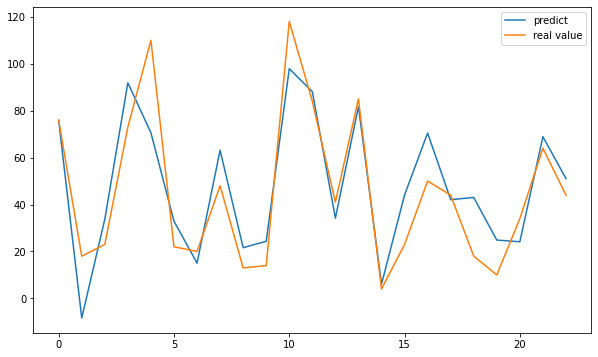

In [32]:
fig = plt.figure(figsize=(10, 6))
plt.plot(mlr.predict(test_input), label = 'predict')
plt.plot(test_target.reshape(-1, 1), label='real value')
plt.legend()
plt.show()

In [33]:
mlr.score(test_input, test_target)

0.759299085839895

In [34]:
mlr.predict([[313, 11.5, 62]])

array([[19.75178047]])

### 다중공선성 확인

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

In [36]:
vif['VIF Factor'] = [variance_inflation_factor(
                    df_dropna.values, i) for i in range(df_dropna.shape[1])]
vif['features'] = df_dropna.columns
vif

,VIF Factor,features
0,6.510408,Ozone
1,6.180306,Solar.R
2,11.642976,Wind
3,67.390306,Temp
4,32.728962,Month
5,4.239501,Day


### StandardScaler

In [37]:
train_input_ss = StandardScaler().fit_transform(train_input)
test_input_ss = StandardScaler().fit_transform(test_input)

In [38]:
mlr_ss = LinearRegression()
mlr_ss.fit(train_input_ss, train_target)

LinearRegression()

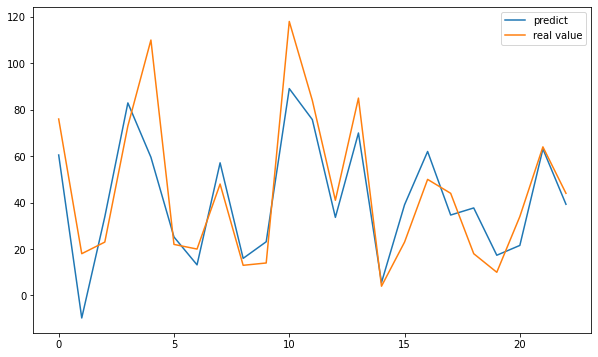

In [39]:
fig = plt.figure(figsize=(10, 6))
plt.plot(mlr_ss.predict(StandardScaler().fit_transform(test_input_ss)), label = 'predict')
plt.plot(test_target.reshape(-1, 1), label='real value')
plt.legend()
plt.show()

In [40]:
mlr_ss.score(test_input_ss, test_target)

0.7311351744387136

### RobustScaler

In [41]:
robustScaler = RobustScaler()

In [42]:
train_input_rb = robustScaler.fit_transform(train_input)
test_input_rb = robustScaler.fit_transform(test_input)

In [43]:
mlr_rb = LinearRegression()
mlr_rb.fit(train_input_ss, train_target)

LinearRegression()

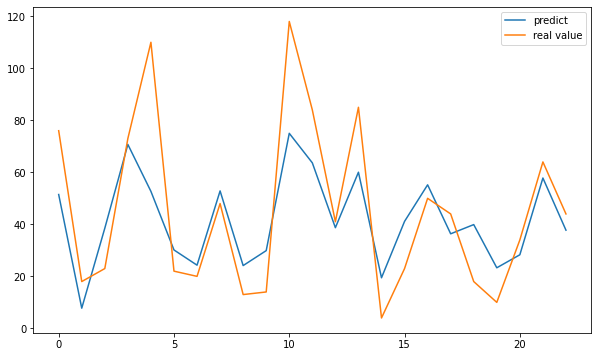

In [44]:
fig = plt.figure(figsize=(10, 6))
plt.plot(mlr_rb.predict(robustScaler.fit_transform(test_input_rb)), label = 'predict')
plt.plot(test_target.reshape(-1, 1), label='real value')
plt.legend()
plt.show()

In [45]:
mlr_rb.score(test_input_rb, test_target)

0.6142500157554789

### MinMaxScaler

In [46]:
minMaxScaler = MinMaxScaler()

In [47]:
train_input_mm = minMaxScaler.fit_transform(train_input)
test_input_mm = minMaxScaler.fit_transform(test_input)

In [48]:
mlr_mm = LinearRegression()
mlr_mm.fit(train_input_mm, train_target)

LinearRegression()

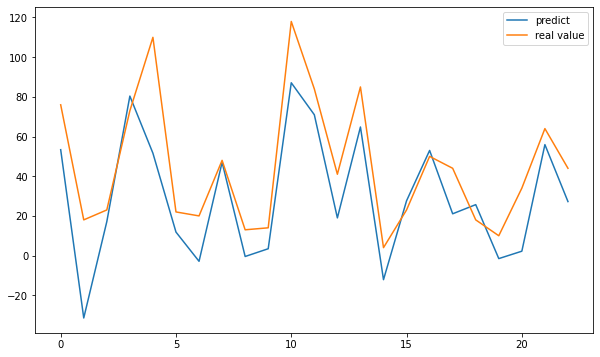

In [49]:
fig = plt.figure(figsize=(10, 6))
plt.plot(mlr_mm.predict(minMaxScaler.fit_transform(test_input_mm)), label = 'predict')
plt.plot(test_target.reshape(-1, 1), label='real value')
plt.legend()
plt.show()

In [50]:
mlr_mm.score(test_input_mm, test_target)

0.4980640998398578

### 아웃라이어 처리

In [51]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    l_bound = q1 - (iqr * 1.5)
    u_bound = q3 + (iqr * 1.5)
    
    return np.where((data > u_bound) | (data < l_bound))

### 130 이상 값 변경

In [52]:
df_dropna.loc[df_dropna['Ozone'] > 130,'Ozone'] = 122

### 이상치 수정 후 분석

In [53]:
arr_input = np.array(df_dropna[['Solar.R', 'Wind', 'Temp']])
arr_target = np.array(df_dropna[['Ozone']])

In [54]:
train_input, test_input, train_target, test_target = train_test_split(arr_input, arr_target, random_state=42, test_size=0.2)

In [55]:
mlr = LinearRegression()
mlr.fit(train_input, train_target)

LinearRegression()

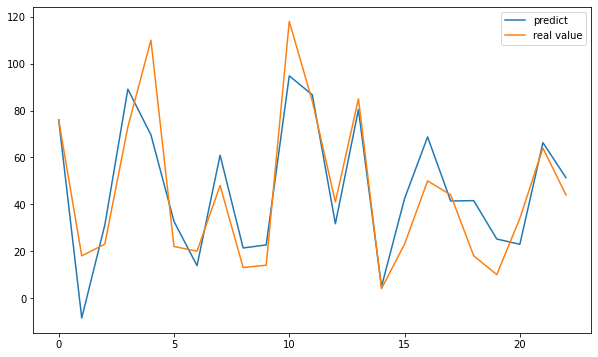

In [56]:
fig = plt.figure(figsize=(10, 6))
plt.plot(mlr.predict(test_input), label = 'predict')
plt.plot(test_target.reshape(-1, 1), label='real value')
plt.legend()
plt.show()

In [57]:
mlr.score(test_input, test_target)

0.7661001325232393

In [58]:
mlr.predict([[313, 11.5, 62]])

array([[18.05922472]])